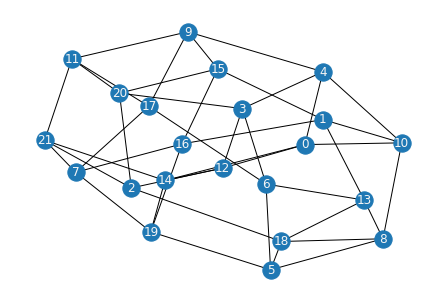

In [1]:
from maxcut_instance_generator import regular_graph

model = regular_graph(num_nodes=22, degree=4, draw=True)

In [2]:
from encoding import RandomAccessEncoder

# Quantum Random Access Encoders
qrac_1_1 = RandomAccessEncoder(1, 1)
qrac_2_1 = RandomAccessEncoder(2, 1)
qrac_3_1 = RandomAccessEncoder(3, 1)

# Hamiltonians
H_1_1 = qrac_1_1.generate_hamiltonian(model)
H_2_1 = qrac_2_1.generate_hamiltonian(model)
H_3_1 = qrac_3_1.generate_hamiltonian(model)

# Print Hamiltonians
# print(qrac_1_1.print_hamiltonian(H_1_1))
# print(qrac_2_1.print_hamiltonian(H_2_1))
print(qrac_3_1.print_hamiltonian(H_3_1))

(0.75+0j)ZIIZIIIII
(0.75+0j)ZIIIIIZII
(0.75+0j)ZIIIXIIII
(0.75+0j)ZIIIIIYII
(0.75+0j)XIIIIIZII
(0.75+0j)XIIIIIXII
(0.75+0j)XIIIYIIII
(0.75+0j)XIIIIIIZI
(0.75+0j)YIIIXIIII
(0.75+0j)YIIIIIIIZ
(0.75+0j)YIIIIIIYI
(0.75+0j)YIIIIIIIX
(0.75+0j)IZIZIIIII
(0.75+0j)IZIXIIIII
(0.75+0j)IZIIXIIII
(0.75+0j)IZIIIIIYI
(0.75+0j)IIZZIIIII
(0.75+0j)IIIZIIZII
(0.75+0j)IXIXIIIII
(0.75+0j)IXIYIIIII
(0.75+0j)IXIIIIIIZ
(0.75+0j)IXIIIZIII
(0.75+0j)IIIXIIXII
(0.75+0j)IIIXIIIXI
(0.75+0j)IYIIIIIZI
(0.75+0j)IYIIIIIXI
(0.75+0j)IYIIIZIII
(0.75+0j)IYIIIIIIX
(0.75+0j)IIIYIIZII
(0.75+0j)IIIYIIXII
(0.75+0j)IIIYIIIIZ
(0.75+0j)IIZIZIIII
(0.75+0j)IIZIYIIII
(0.75+0j)IIZIIIIXI
(0.75+0j)IIIIZIIXI
(0.75+0j)IIIIZIIYI
(0.75+0j)IIIIZIIIX
(0.75+0j)IIIIXIYII
(0.75+0j)IIIIIIXIZ
(0.75+0j)IIIIIZYII
(0.75+0j)IIIIIIYIX
(0.75+0j)IIIIYIIZI
(0.75+0j)IIIIYIIYI
(0.75+0j)IIIIIZIZI
(-22+0j)IIIIIIIII
None


In [3]:
print(len(qrac_1_1.qubit_to_vertex_map), len(qrac_1_1.calculate_edge_among_qubits(model)))
print(len(qrac_2_1.qubit_to_vertex_map), len(qrac_2_1.calculate_edge_among_qubits(model)))
print(len(qrac_3_1.qubit_to_vertex_map), len(qrac_3_1.calculate_edge_among_qubits(model)))

22 44
12 28
9 22


In [4]:
import numpy as np
from vqe import VQEForQRAO

from scipy.optimize import minimize

# Example of Level = 1
cost_history_1_1 = []
cost_history_2_1 = []
cost_history_3_1 = []
init_theta_list_1_1 = np.random.random(len(qrac_1_1.qubit_to_vertex_map) * 2) * 1e-1
init_theta_list_2_1 = np.random.random(len(qrac_2_1.qubit_to_vertex_map) * 2) * 1e-1
init_theta_list_3_1 = np.random.random(len(qrac_3_1.qubit_to_vertex_map) * 2) * 1e-1

vqe_1_1 = VQEForQRAO(
    hamiltonian=H_1_1, rotation_gate="normal", entanglement="compatible",
    num_layer=1, qubit_pairs=qrac_1_1.calculate_edge_among_qubits(model),
)
vqe_2_1 = VQEForQRAO(
    hamiltonian=H_2_1, rotation_gate="normal", entanglement="compatible",
    num_layer=1, qubit_pairs=qrac_2_1.calculate_edge_among_qubits(model),
)
vqe_3_1 = VQEForQRAO(
    hamiltonian=H_3_1, rotation_gate="normal", entanglement="compatible",
    num_layer=1, qubit_pairs=qrac_3_1.calculate_edge_among_qubits(model),
)

cost_history_1_1.append(vqe_1_1._cost_function(init_theta_list_1_1))
cost_history_2_1.append(vqe_2_1._cost_function(init_theta_list_2_1))
cost_history_3_1.append(vqe_3_1._cost_function(init_theta_list_3_1))

method = "BFGS"
options = {"disp": True, "maxiter": 50, "gtol": 1e-6}

num_iter_1_1 = 1
num_iter_2_1 = 1
num_iter_3_1 = 1

def callback_1_1(x):
    global num_iter_1_1
    cost_val_1_1 = vqe_1_1._cost_function(x) 
    cost_history_1_1.append(cost_val_1_1)
    print(f'{num_iter_1_1}/{options["maxiter"]}\t{cost_val_1_1}')
    num_iter_1_1 += 1

def callback_2_1(x):
    global num_iter_2_1
    cost_val_2_1 = vqe_2_1._cost_function(x) 
    cost_history_2_1.append(cost_val_2_1)
    print(f'{num_iter_2_1}/{options["maxiter"]}\t{cost_val_2_1}')
    num_iter_2_1 += 1

def callback_3_1(x):
    global num_iter_3_1
    cost_val_3_1 = vqe_3_1._cost_function(x) 
    cost_history_3_1.append(cost_val_3_1)
    print(f'{num_iter_3_1}/{options["maxiter"]}\t{cost_val_3_1}')
    num_iter_3_1 += 1

print("Iter\tcost")
opt_1_1 = minimize(
    vqe_1_1._cost_function,
    init_theta_list_1_1,
    method=method,
    options=options,
    callback=callback_1_1,
)

print("Iter\tcost")
opt_2_1 = minimize(
    vqe_2_1._cost_function,
    init_theta_list_2_1,
    method=method,
    options=options,
    callback=callback_2_1,
)

print("Iter\tcost")
opt_3_1 = minimize(
    vqe_3_1._cost_function,
    init_theta_list_3_1,
    method=method,
    options=options,
    callback=callback_3_1,
)

Iter	cost
1/50	-22.105576181038973
2/50	-22.587294592831924
3/50	-23.387283464071174
4/50	-24.43021291112528
5/50	-25.591346160933305
6/50	-26.075358490029636
7/50	-26.850410931676315
8/50	-27.51764924246492
9/50	-27.733619678472593
10/50	-27.955911624818196
11/50	-27.976924755308495
12/50	-27.998567346190566
13/50	-27.999075197535635
14/50	-27.99976427607551
15/50	-27.99993992728685
16/50	-27.99998235129229
17/50	-27.999998951910648
18/50	-27.999999887610368
19/50	-27.99999999121078
20/50	-27.999999999758504
21/50	-27.99999999997302
22/50	-27.999999999995143
23/50	-27.999999999995303
24/50	-27.999999999995502
25/50	-27.9999999999958
26/50	-27.999999999996277
27/50	-27.999999999996962
28/50	-27.99999999999787
29/50	-27.999999999998806
30/50	-27.999999999999304
31/50	-27.99999999999944
32/50	-27.999999999999492
Optimization terminated successfully.
         Current function value: -28.000000
         Iterations: 32
         Function evaluations: 1800
         Gradient evaluations: 40
It

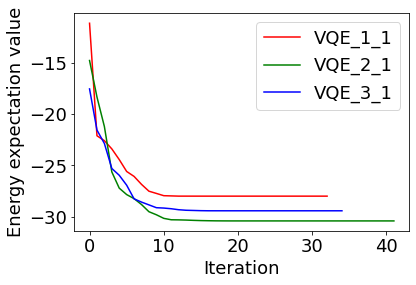

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["font.size"] = 18
plt.plot(cost_history_1_1, color="red", label="VQE_1_1")
plt.plot(cost_history_2_1, color="green", label="VQE_2_1")
plt.plot(cost_history_3_1, color="blue", label="VQE_3_1")
plt.xlabel("Iteration")
plt.ylabel("Energy expectation value")
plt.legend()
plt.show()